## Homework 2

Nils Winkler, nilschristian.winkler@uzh.ch

Eleonora Salcuni, salcunieleonora0@gmail.com

Petrit Bllaca, petrit.bllc@gmail.com

### Task 1

In [7]:
import sys
sys.path.append('..')

from pimpa.scenario_generation.geometric_brownian_motion import GeometricBrownianMotion
from pimpa.utils.calendar_utils import generate_simulation_dates_schedule
from pimpa.utils.notebook_tools import test_rfe_mean_and_vola, plot_rfe_paths, simulate_single_risk_factor
from pimpa.market_data_objects.market_data_builder import MarketDataBuilder
from data.configuration.global_parameters import global_parameters, calibration_parameters

from pimpa.trade_models.portfolio import Portfolio
from pimpa.evaluators.ccr_valuation_session import CCR_Valuation_Session

import warnings
warnings.filterwarnings("ignore")


Generating simulation dates

In [8]:
starting_date = '2010-01-01'
final_date = '2020-01-01'
valuation_frequency = 'monthly'
nr_paths = global_parameters['n_paths']
simulation_dates = generate_simulation_dates_schedule(starting_date, final_date, valuation_frequency, global_parameters)

Testing GBP USD

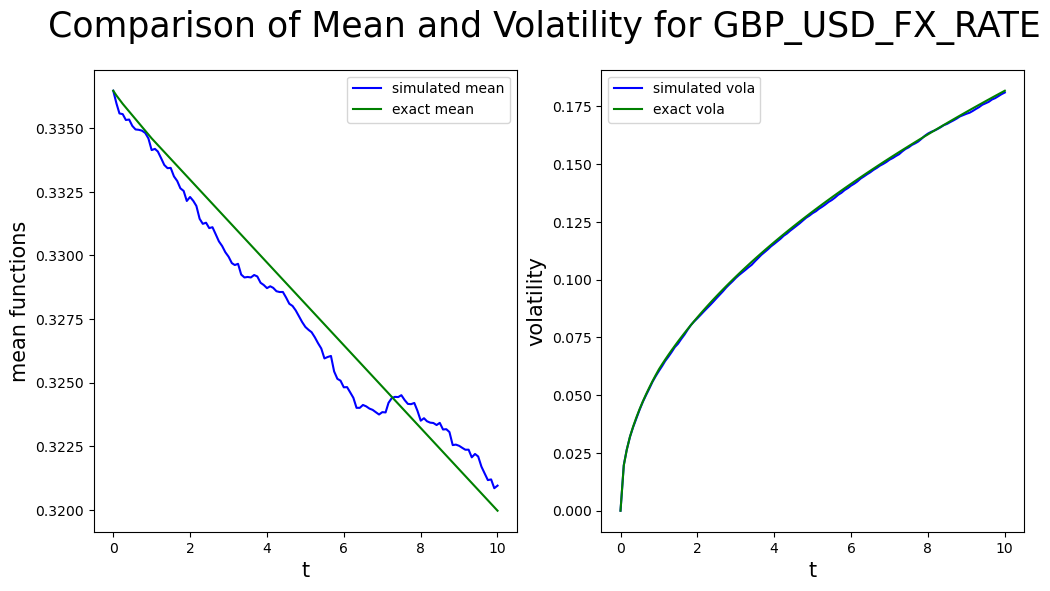

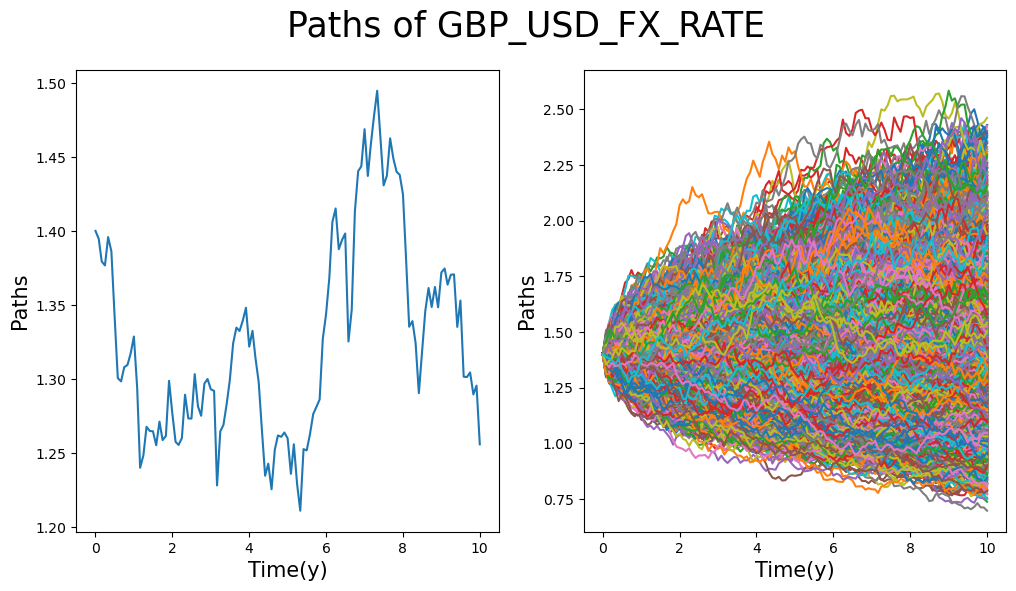

In [9]:
S_GBM = GeometricBrownianMotion('GBP_USD_FX_RATE')
RFE_dependencies=S_GBM.get_dependencies(calibration_parameters)
market_data=MarketDataBuilder().load_market_data(RFE_dependencies, global_parameters)
S_GBM.calibrate(market_data=market_data, calibration_parameters=calibration_parameters)

paths = simulate_single_risk_factor(S_GBM, simulation_dates, nr_paths)
test_rfe_mean_and_vola(paths, simulation_dates, S_GBM)
plot_rfe_paths(paths, simulation_dates, S_GBM.name)

Testing EUR USD

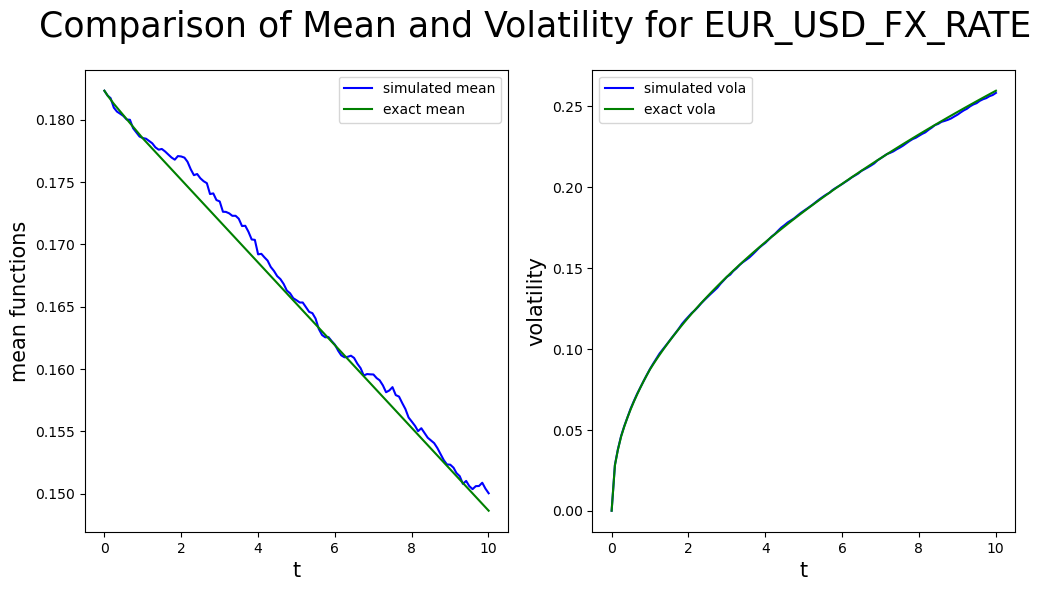

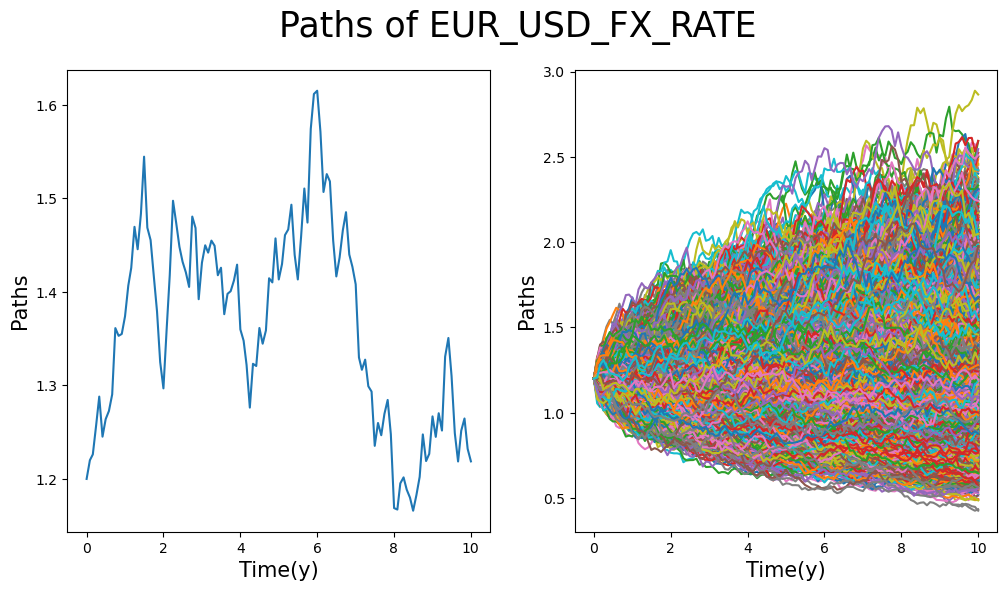

In [10]:
S_GBM = GeometricBrownianMotion('EUR_USD_FX_RATE')
RFE_dependencies=S_GBM.get_dependencies(calibration_parameters)
market_data=MarketDataBuilder().load_market_data(RFE_dependencies, global_parameters)
S_GBM.calibrate(market_data=market_data, calibration_parameters=calibration_parameters)

paths = simulate_single_risk_factor(S_GBM, simulation_dates, nr_paths)
test_rfe_mean_and_vola(paths, simulation_dates, S_GBM)
plot_rfe_paths(paths, simulation_dates, S_GBM.name)

### Task 2

Loading Portfolio

In [5]:
netting_agreement_id = 28
test_portfolio_1 = Portfolio(netting_agreement_id)
print('-----------------------------')
print('BEFORE LOAD:')
print(test_portfolio_1)
print('-----------------------------')
test_portfolio_1.load(global_parameters)
print('AFTER LOAD:')
print(test_portfolio_1)
print('-----------------------------')
print(test_portfolio_1.netting_sets)
print('-----------------------------')

-----------------------------
BEFORE LOAD:
Portfolio with netting_agreement_id: 28
NOT AVAILABLE
-----------------------------
AFTER LOAD:
Portfolio with netting_agreement_id: 28
- including trade_IDs: [4234]
- including netting_sets: ['28_MAIN']
- with underlyings: {'EUR_ZERO_YIELD_CURVE', 'GBP_USD_FX_RATE', 'GBP_ZERO_YIELD_CURVE', 'EUR_USD_FX_RATE'}
- with 0 valuation points.
AVAILABLE
-----------------------------
{'28_MAIN': [4234]}
-----------------------------


Running CCR Valuation Session and calculating EE and PE

In [6]:
netting_agreement_id = 28

portfolio_1 = Portfolio(netting_agreement_id)
portfolio_1.load(global_parameters)
print('-----------------------------')
print('Portfolio underlyings:')
for rf in portfolio_1.portfolio_underlyings:
    print(rf)
print('-----------------------------')
print('Portfolio trades:')
for _, trade in portfolio_1.trade_inventory.items():
    print(trade)
portfolio_1_run = CCR_Valuation_Session(portfolio_1)
today_date = '2019-10-10'
portfolio_1_run.run(today_date, global_parameters)
print('-----------------------------')
print('Market dependencies:')
print(portfolio_1_run.market_dependencies)
print('-----------------------------')
print('Risk factors:')
for rf in portfolio_1_run.risk_factors.values():
    print(rf)
print('-----------------------------')
print('Portfolio netting sets:')
print(portfolio_1.netting_sets)
print('-----------------------------')
print('VM_collateral_agreements:')
print(portfolio_1.vm_collateral_agreements)
print('-----------------------------')
print('valuation as of: '+today_date)
portfolio_1_exposures = portfolio_1_run.get_exposures()
print('-----------------------------')
print(portfolio_1_exposures)
print('-----------------------------')

-----------------------------
Portfolio underlyings:
EUR_ZERO_YIELD_CURVE
GBP_USD_FX_RATE
GBP_ZERO_YIELD_CURVE
EUR_USD_FX_RATE
-----------------------------
Portfolio trades:
Trade with trade_id: 4234
- trade type: FX_FWD
- asset class: FX
- trade currency: GBP
- trade underlyings: ['EUR_ZERO_YIELD_CURVE', 'GBP_ZERO_YIELD_CURVE', 'EUR_USD_FX_RATE', 'GBP_USD_FX_RATE']
- trade attributes keys: ['notional_1', 'notional_2', 'currency_1', 'currency_2', 'long/short', 'maturity'])
- with 0 valuation points.
AVAILABLE


-----------------------------
Market dependencies:
{('fx_implied_volatility_surface', 'EUR_USD_IMPLIED_VOLATILITY_SURFACE'), ('historical_fixings', 'EUR_ZERO_YIELD_CURVE'), ('RFE_HW1F_calibration', 'GBP_ZERO_YIELD_CURVE'), ('RFE_HW1F_calibration', 'EUR_ZERO_YIELD_CURVE'), ('Pricing_HW1F_calibration', 'GBP_ZERO_YIELD_CURVE'), ('fx_spot', 'GBP_USD_FX_RATE'), ('Pricing_HW1F_calibration', 'EUR_ZERO_YIELD_CURVE'), ('fx_spot', 'EUR_USD_FX_RATE'), ('fx_implied_volatility_surface', 'GBP_USD_IMPLIED_VOLATILITY_SURFACE'), ('historical_fixings', 'GBP_ZERO_YIELD_CURVE')}
-----------------------------
Risk factors:
RiskFactor(name='EUR_ZERO_YIELD_CURVE', asset_class='IR', asset_type='DISCOUNT_CURVE', currency='EUR', simulated=True, model=<pimpa.scenario_generation.hw1f.HW1F object at 0x0000026A2C01FFB0>, model_name='HW1F', reference=None)
RiskFactor(name='GBP_ZERO_YIELD_CURVE', asset_class='IR', asset_type='DISCOUNT_CURVE', currency='GBP', simulated=True, model=<pimpa.scenario_generation.hw1f.HW1F 